

**COURSE - AI ALGORITHMS I**

**COURSE CODE - AIDI 1002**

**PROJECT TOPIC - CAMPUS RECRUITMENT**

**SUBMISSION DATE - 2022-04-08**

Instructions -


**NAMES:**

CHISOM NNABUISI

DHRUV MISTRY

HENIL SHAH

KAR CHUN KAN

SHANUKA RATHNAYAKE MUDIYANSELAGE

--------------------------------------------------------------------------------


# Importing needed libraries 

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler


In [15]:
data = pd.read_csv(r"Placement.csv")# Importing DataSet

In [16]:
data.head()# Displaying first 5 elements

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [17]:
# Data Transformation
data['gender'].replace(to_replace=['M', 'F'], value=[0, 1], inplace=True) # Male - 0 ; Female - 1
data['ssc_b'].replace(to_replace=['Others', 'Central'], value=[0, 1], inplace=True) # Others - 0, Central - 1
data['hsc_b'].replace(to_replace=['Others', 'Central'], value=[0, 1], inplace=True) # Others - 0, Central - 1
data['hsc_s'].replace(to_replace=['Commerce', 'Science', 'Arts'], value=[0, 1, 2], inplace=True) # Commerce - 0, Science - 1, Arts - 2
data['degree_t'].replace(to_replace=['Sci&Tech', 'Comm&Mgmt', 'Others'], value=[0, 1, 2], inplace=True) # Sci&Tech - 0, Comm&Mgmt - 1, Others - 2
data['workex'].replace(to_replace=['No', 'Yes'], value=[0, 1], inplace=True) # No - 0, Yes - 1
data['specialisation'].replace(to_replace=['Mkt&HR', 'Mkt&Fin'], value=[0, 1], inplace=True) # Mkt&HR - 0, Mkt&Fin - 1
data['status'].replace(to_replace=['Placed', 'Not Placed'], value=[0, 1], inplace=True) # Placed - 0, Not Placed - 1

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    int64  
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    int64  
 6   hsc_s           215 non-null    int64  
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    int64  
 9   workex          215 non-null    int64  
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    int64  
 12  mba_p           215 non-null    float64
 13  status          215 non-null    int64  
 14  salary          148 non-null    float64
dtypes: float64(6), int64(9)
memory usage: 25.3 KB


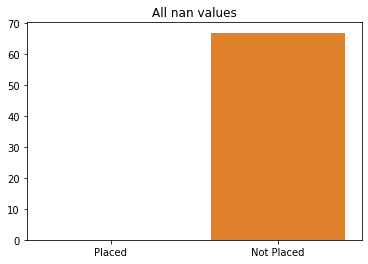

In [19]:
count = data[data.isnull().any(axis=1)].status.value_counts() # all null values count
sns.barplot(x=["Placed","Not Placed"], y=[int(count.get(0) or 0),int(count.get(1) or 0)])
plt.title("All nan values")
plt.show()

In [20]:
data['salary'].replace(to_replace=np.nan, value=0, inplace=True)# Raplacing NaN to 0

In [22]:
data.info()# No Null Values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    int64  
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    int64  
 6   hsc_s           215 non-null    int64  
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    int64  
 9   workex          215 non-null    int64  
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    int64  
 12  mba_p           215 non-null    float64
 13  status          215 non-null    int64  
 14  salary          215 non-null    float64
dtypes: float64(6), int64(9)
memory usage: 25.3 KB


In [ ]:
data.describe()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,0.353488,67.303395,0.539535,66.333163,0.390698,0.525581,66.370186,0.776744,0.344186,72.100558,0.558140,62.278186,0.311628,198702.325581
std,62.209324,0.479168,10.827205,0.499598,10.897509,0.489045,0.594403,7.358743,0.526333,0.476211,13.275956,0.497767,5.833385,0.464240,154780.926716
min,1.000000,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,0.000000,0.000000
25%,54.500000,0.000000,60.600000,0.000000,60.900000,0.000000,0.000000,61.000000,0.000000,0.000000,60.000000,0.000000,57.945000,0.000000,0.000000
50%,108.000000,0.000000,67.000000,1.000000,65.000000,0.000000,0.000000,66.000000,1.000000,0.000000,71.000000,1.000000,62.000000,0.000000,240000.000000
75%,161.500000,1.000000,75.700000,1.000000,73.000000,1.000000,1.000000,72.000000,1.000000,1.000000,83.500000,1.000000,66.255000,1.000000,282500.000000
max,215.000000,1.000000,89.400000,1.000000,97.700000,1.000000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.000000,940000.000000


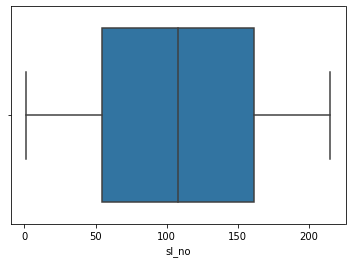

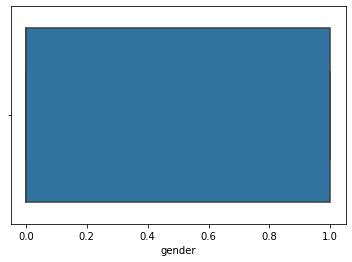

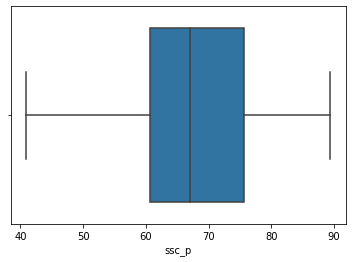

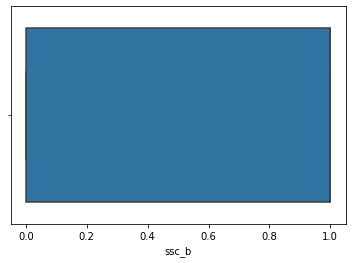

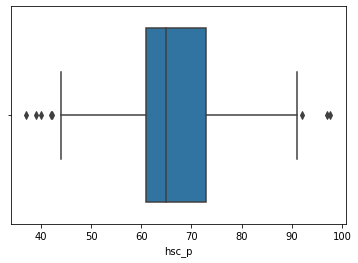

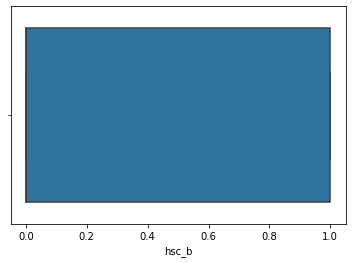

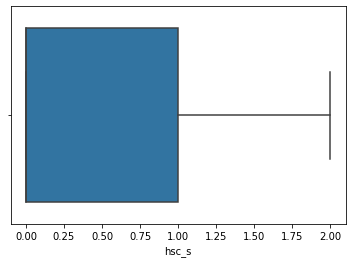

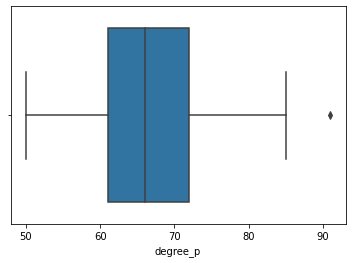

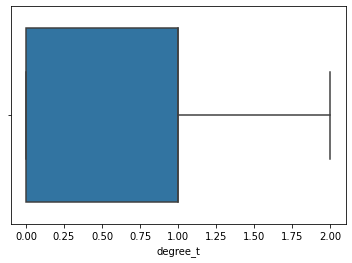

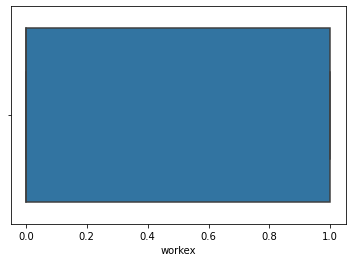

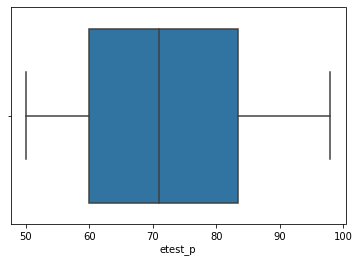

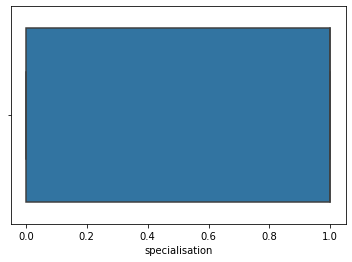

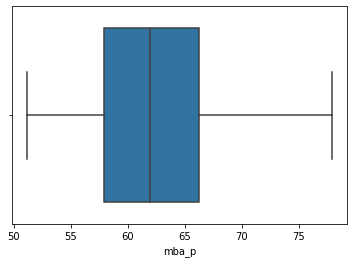

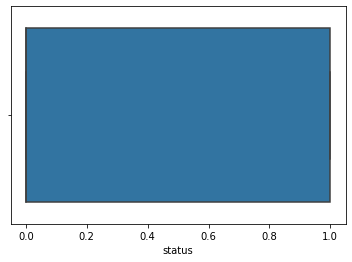

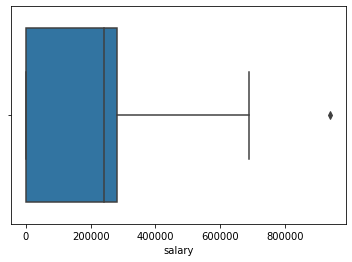

In [23]:
# Check the outliers
numeric = [col for col in data.columns if data[col].dtypes != object]
for i in numeric:
  sns.boxplot(x = data[i])
  plt.show()

In [24]:
data.loc[data.salary > 800000]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,120,0,60.8,1,68.4,1,0,64.6,1,1,82.66,1,64.34,0,940000.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


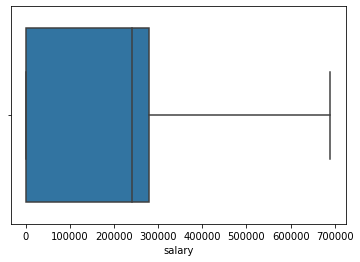

In [25]:
#median imputation
q1 = data['salary'].quantile(0.25)
q3 = data['salary'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(data['salary'])
for i in data['salary']:
    if i > Upper_tail or i < Lower_tail:
            data['salary'] = data['salary'].replace(i, med)
sns.boxplot(data['salary'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


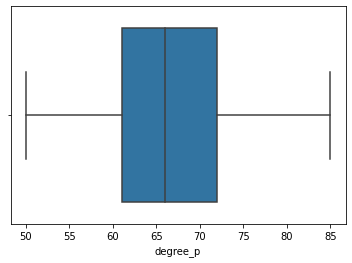

In [26]:
#median imputation
q1 = data['degree_p'].quantile(0.25)
q3 = data['degree_p'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(data['degree_p'])
for i in data['degree_p']:
    if i > Upper_tail or i < Lower_tail:
            data['degree_p'] = data['degree_p'].replace(i, med)
sns.boxplot(data['degree_p'])
plt.show()

In [27]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [28]:
# check vif
numeric = [col for col in data.columns if data[col].dtypes != object]
dt = data[numeric]
calc_vif(dt)

,variables,VIF
0,sl_no,4.199459
1,gender,1.840326
2,ssc_p,87.266875
3,ssc_b,3.834292
4,hsc_p,73.579853
5,hsc_b,2.724463
6,hsc_s,2.065303
7,degree_p,120.332967
8,degree_t,3.501166
9,workex,1.796448


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


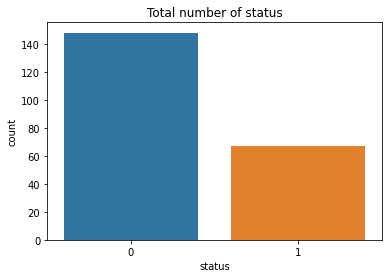

In [29]:
#analysing target variable using graph to better understand the data
sns.countplot(data.status)
plt.title("Total number of status")
plt.show()

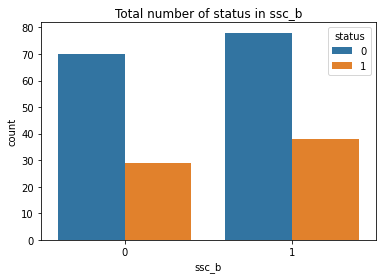

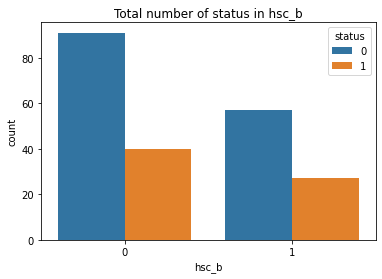

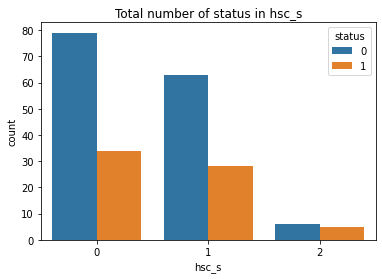

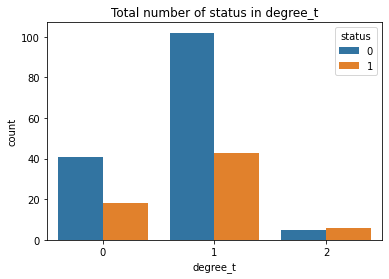

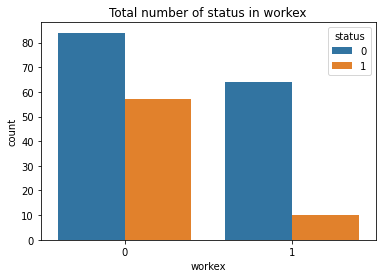

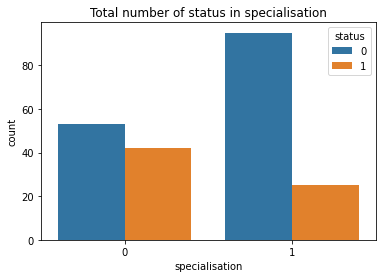

In [30]:
not_col = ["sl_no","salary","gender","ssc_p","hsc_p","degree_p","etest_p","mba_p","status"]
numeric = [col for col in data.columns if data[col].dtypes != object and col not in not_col]
for i in numeric:
  plt.title(f"Total number of status in {i}")
  sns.countplot(x=data[i],hue=data.status, data=data)
  plt.show()

Indian educational system grading

Letter Grade	Marks	Grade Point

O	80 and above	10

A	75 to 79.99	9

B	70 to 74.99	8

C	60 to 69.99	7

D	50 to 59.99	6

E	45 to 49.99	5

P	40 to 44.99	4

F (Fail)	39.99 and below	0

In [33]:
data2 = pd.DataFrame()

In [34]:
grade_pt = [0,4,5,6,7,8,9,10]
marks = [[0,39.99],[40,44.99],[45,49.99],[50,59.99],[60,69.99],[70,74.99],[75,79.99],[80,100]]
col_p = ["ssc_p","hsc_p","degree_p","etest_p","mba_p"]
for col in col_p:
  data2[col] = data[col]
for pt,marks in zip(grade_pt,marks):
  for col in col_p:
    #print(pt,marks[0],marks[1],col)
    data2.loc[(data[col]>=marks[0]) & (data[col]<=marks[1]), col] = pt

In [35]:
data[col_p] = data2[col_p] # change percentage to grade point

In [36]:
data2["status"]=data["status"]
data2["salary"]=data["salary"]

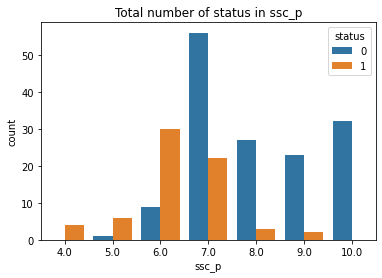

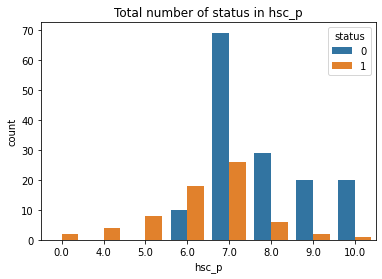

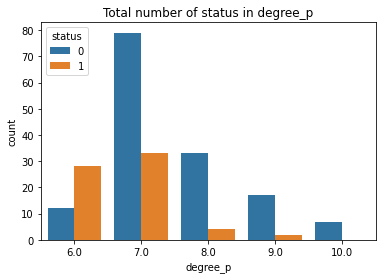

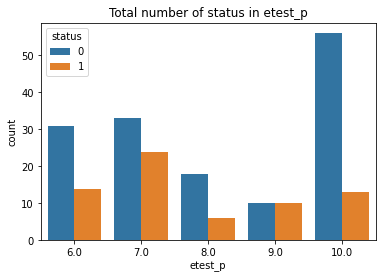

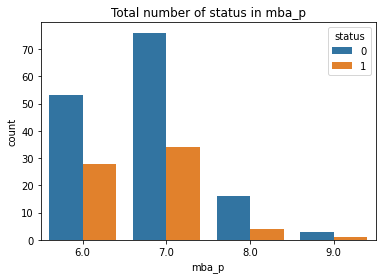

In [37]:
numeric = [col for col in data2.columns if data2[col].dtypes != object and col != 'status' and col != 'salary']
for i in numeric:
  sns.countplot(x=data2[i],hue=data2.status, data=data2)
  plt.title(f"Total number of status in {i}")
  plt.show()

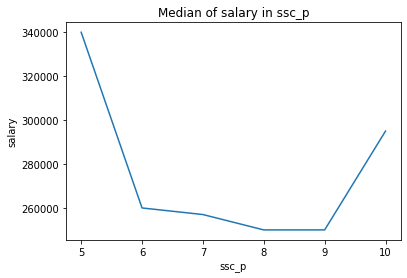

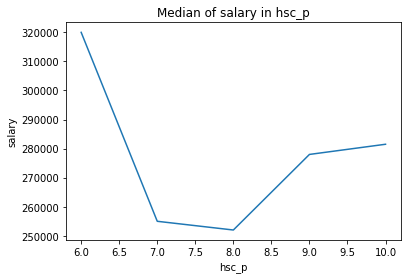

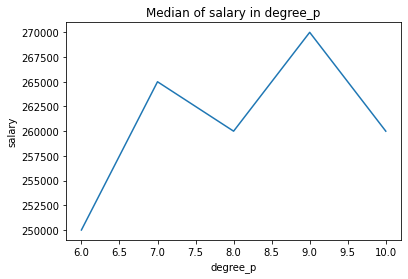

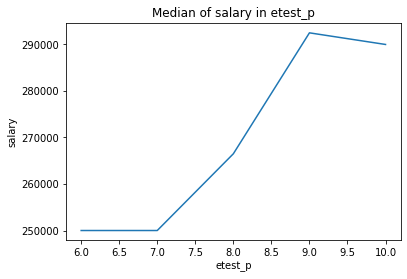

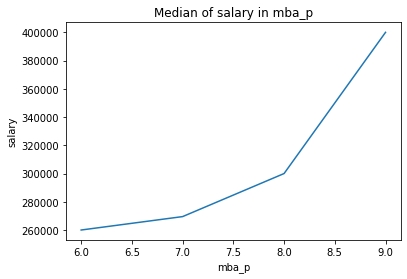

In [38]:
#e_test_p Employability test percentage
numeric = [col for col in data2.columns if data2[col].dtypes != object and col != 'status' and col != 'salary']
for i in numeric:
  sns.lineplot(x=i,y="salary", data=data2.loc[data2.status==0][[i,"salary"]].groupby(i).median().reset_index())
  plt.title(f"Median of salary in {i}")
  plt.show()

In [39]:
X = data.iloc[:,1:-2]# indepented variable and droping Patinet ID
y = data.iloc[:,-2]# Target Data
salary = data.iloc[:,-1]

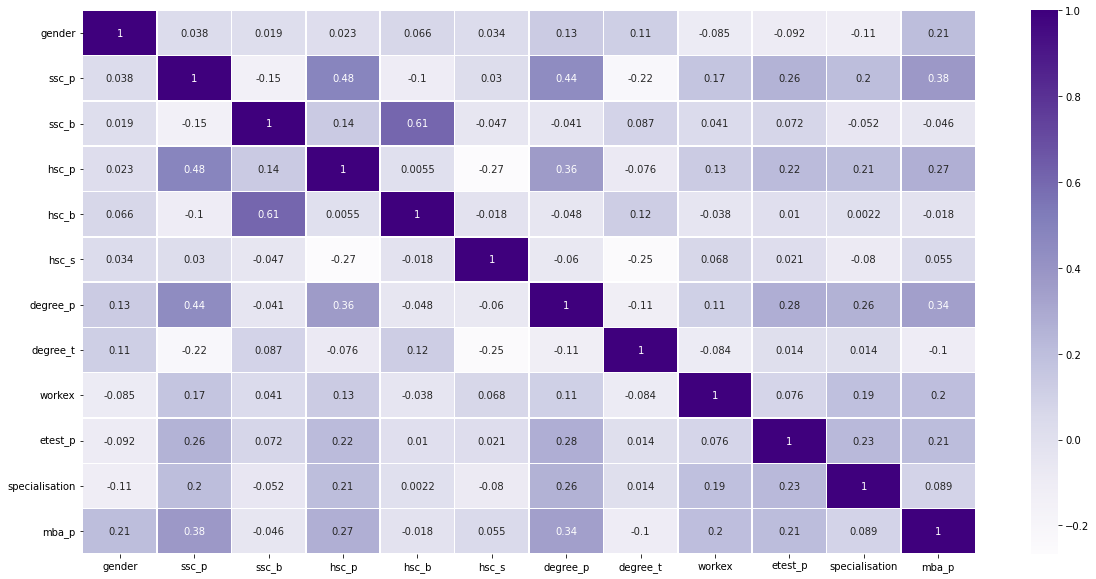

In [40]:
correlationMatrix = X.corr()

plt.figure(figsize = (20,10))
sns.heatmap(correlationMatrix, annot = True, cmap = "Purples", linewidths = 0.5)
# There is no correlation more then 0.8

In [41]:
# Finding Features with higher correlation value then threshold value
threshold = 0.8

corrFeatures = set()# Correlation Features

#correlationMatrix = data.corr()
for i in range(len(correlationMatrix.columns)):
    for j in range(i):
        if abs(correlationMatrix.iloc[i,j]) >= threshold: # comparing correlation value to threshold value
            corrFeatures.add(correlationMatrix.columns[i])# Adding the Features to the set

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,0,7.0,0,10.0,0,0,6.0,0,0,6.0,0,6.0
1,0,9.0,1,9.0,0,1,9.0,0,1,10.0,1,7.0
2,0,7.0,1,7.0,1,2,7.0,1,0,9.0,1,6.0
3,0,6.0,1,6.0,1,1,6.0,0,0,7.0,0,6.0
4,0,10.0,1,8.0,1,0,8.0,1,0,10.0,1,6.0


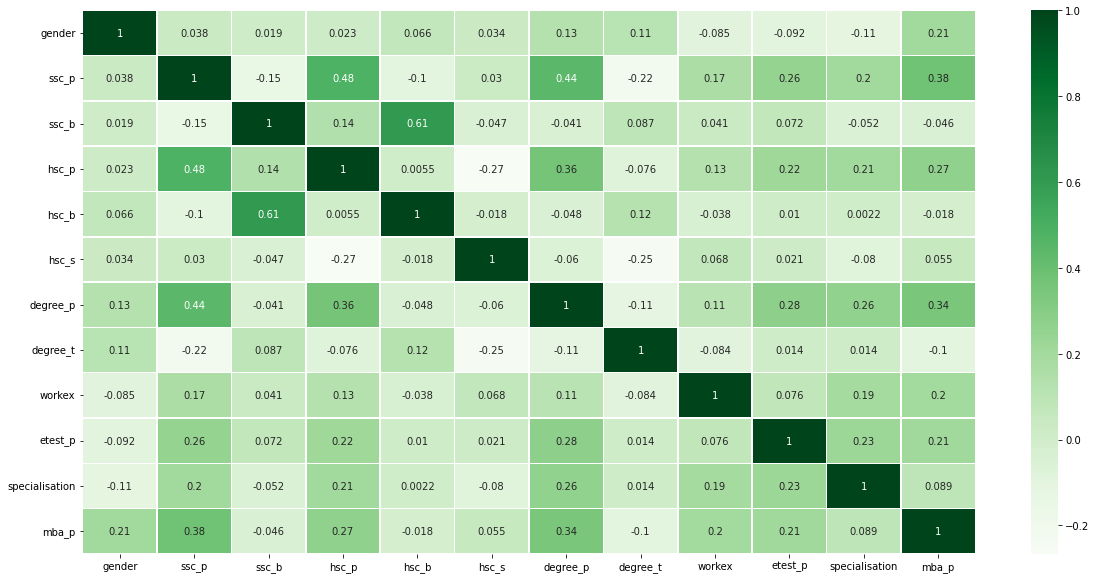

In [43]:
X_new =  X.drop(corrFeatures, axis = 1)
correlationMatrix = X_new.corr()

plt.figure(figsize = (20,10))
sns.heatmap(correlationMatrix, annot = True, cmap = "Greens", linewidths = 0.5)
X_new.head()

In [46]:
#Create training and testing variables by splitting data into 70:30 train:test ratio
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

#Create testing and validation variables by splitting test data into 50:50 test:validate ratio
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f"Total:{X_new.shape}{y.shape}")
print(f"Train:{X_train.shape}{y_train.shape}")
print(f"Test:{X_test.shape}{y_test.shape}")
print(f"Validation:{X_valid.shape}{y_valid.shape}")

Total:(215, 12)(215,)
Train:(150, 12)(150,)
Test:(32, 12)(32,)
Validation:(33, 12)(33,)


In [48]:
# Feature Scaling
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.fit_transform(X)

RANDOM FOREST ALGORITHM

In [55]:
classifier = RandomForestClassifier(n_estimators=10,  criterion="entropy")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88        24
           1       0.75      0.38      0.50         8

    accuracy                           0.81        32
   macro avg       0.79      0.67      0.69        32
weighted avg       0.80      0.81      0.79        32



In [56]:
y_pred_val = classifier.predict(X_valid)
print(classification_report(y_valid, y_pred_val))

              precision    recall  f1-score   support

           0       0.68      0.85      0.76        20
           1       0.62      0.38      0.48        13

    accuracy                           0.67        33
   macro avg       0.65      0.62      0.62        33
weighted avg       0.66      0.67      0.65        33



In [57]:


#Evaluating the Accuracy score of the classification model


print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred_val)*100)

Accuracy: 81.25
Accuracy: 66.66666666666666


NAIVE BAYES ALGORITHM

In [ ]:
gnb = GaussianNB()
#Train the model using the training sets
gnb = gnb.fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

print(classification_report(y_test,gnb_predictions))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.67      0.40      0.50         5

    accuracy                           0.81        21
   macro avg       0.75      0.67      0.69        21
weighted avg       0.79      0.81      0.79        21



In [ ]:
accuracy = gnb.score(X_test, y_test)
print(accuracy)

0.8095238095238095


K-NEAREST NEIGHBOUR ALGORITHM 

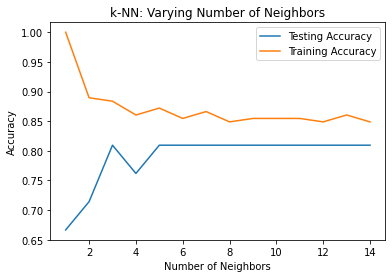

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn 3
    knn = KNeighborsClassifier(n_neighbors= k )

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

LOGISTICS REGRESSION ALGORITHM

In [ ]:
log_reg = LogisticRegression(class_weight='balanced') # balanced the class, as the dataset is imbalanced 
log_reg.fit(X_train,y_train)
pred_logr_base = log_reg.predict(X_test)
print(classification_report(y_test,pred_logr_base))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.67      0.80      0.73         5

    accuracy                           0.86        21
   macro avg       0.80      0.84      0.82        21
weighted avg       0.87      0.86      0.86        21



In [ ]:
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression()
grid={"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":["l2"], "class_weight":["balanced"]}# l2 ridge
log_reg_cv=GridSearchCV(log_reg,grid,scoring="accuracy",cv=5,n_jobs=-1, refit=True)
log_reg_cv.fit(X_train,y_train)

print("tuned best parameters: ",log_reg_cv.best_params_)
print("accuracy :",log_reg_cv.best_score_)

tuned best parameters:  {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}
accuracy : 0.8255462184873948


In [ ]:
# use the best parameters
best_model_logr = LogisticRegression(C=log_reg_cv.best_params_['C'], penalty=log_reg_cv.best_params_['penalty'],class_weight='balanced')
best_model_logr.fit(X_train, y_train)
pred_logr = best_model_logr.predict(X_test)
print(classification_report(y_test,pred_logr))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.67      0.80      0.73         5

    accuracy                           0.86        21
   macro avg       0.80      0.84      0.82        21
weighted avg       0.87      0.86      0.86        21



SUPPORT VECTOR MACHINE ALGORITHM

In [60]:
#training SVM model with linear kernel

model = SVC(kernel='linear', C = 1)
model.fit(X_train, y_train)

#predicting output for test data
svc_pred = model.predict(X_test)
print(svc_pred)

[0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0]


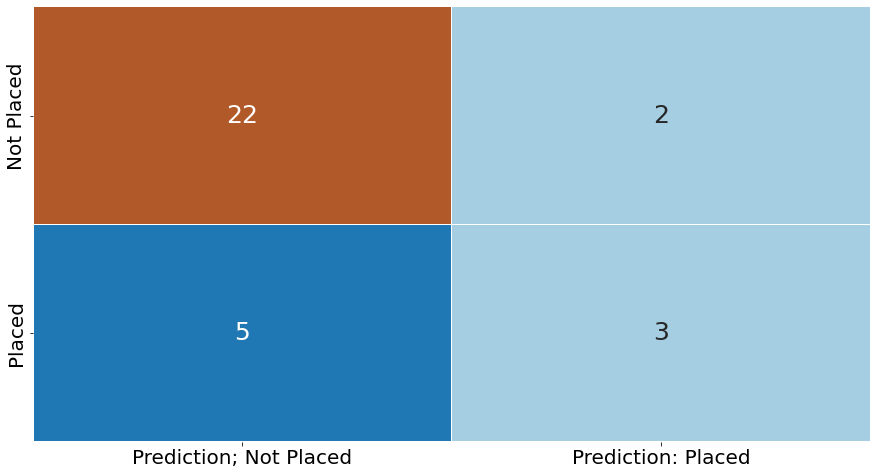

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        24
           1       0.60      0.38      0.46         8

    accuracy                           0.78        32
   macro avg       0.71      0.65      0.66        32
weighted avg       0.76      0.78      0.76        32



In [62]:
#building confusion matrix to evaluate the performance of the clasification model

cm = confusion_matrix(y_test, svc_pred)
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Prediction; Not Placed','Prediction: Placed'], index = ['Not Placed','Placed'])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

#printing the classification report to see the accuracy score of the model and more inferences like precision, recall

print(classification_report(y_test,svc_pred))

In [ ]:
#Evaluating the Accuracy score of the classification model
print("Accuracy:",metrics.accuracy_score(y_test, pred)*100)

Accuracy: 76.19047619047619
